# imports and merge

In [1]:
print('final')
import pandas as pd
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
train = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
test = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
movies = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
movies.drop_duplicates(subset=['movieid'],keep='first',inplace=True)
dataframe = pd.merge(train,movies,how='left' ,on='movieid')
merged_test = pd.merge(test,movies,how='left' ,on='movieid')

print('merged')
# dataframe.to_csv("dataframe.csv", index=False)

final
merged


# Exploratory Data Analysis

In [2]:
dataframe.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


In [3]:
dataframe.shape

(162758, 18)

In [4]:
dataframe.dtypes

movieid                  object
reviewerName             object
isFrequentReviewer         bool
reviewText               object
sentiment                object
title                    object
audienceScore           float64
rating                   object
ratingContents           object
releaseDateTheaters      object
releaseDateStreaming     object
runtimeMinutes          float64
genre                    object
originalLanguage         object
director                 object
boxOffice                object
distributor              object
soundType                object
dtype: object

Target Variable

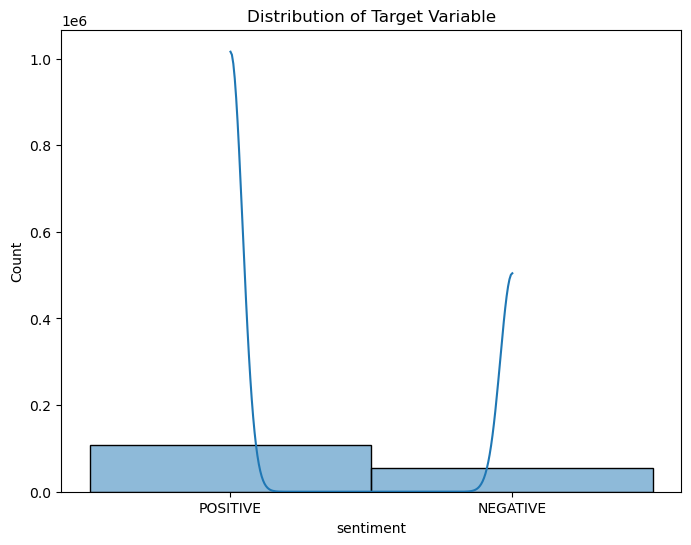

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(dataframe["sentiment"], kde=True)
plt.title("Distribution of Target Variable")
plt.show()

Feature Distribution

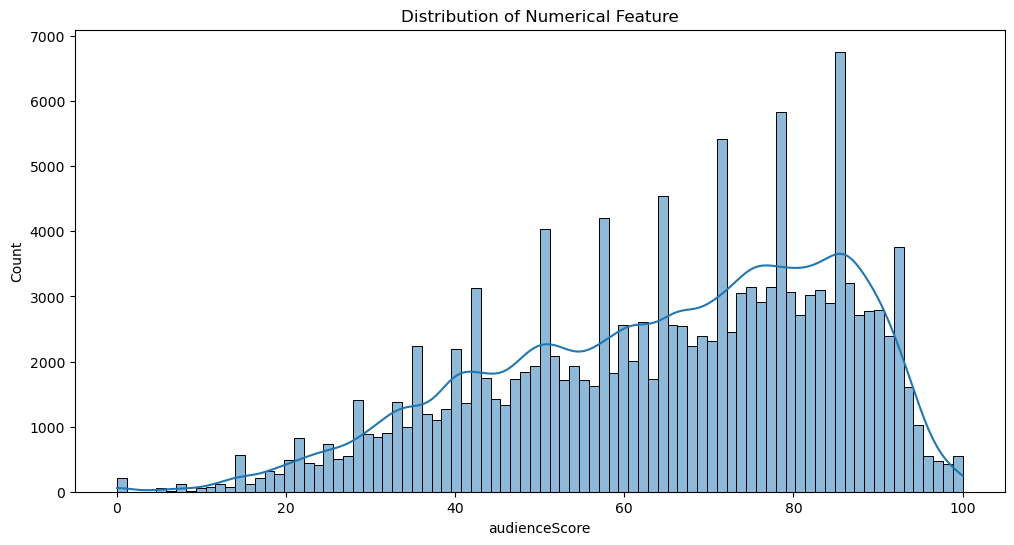

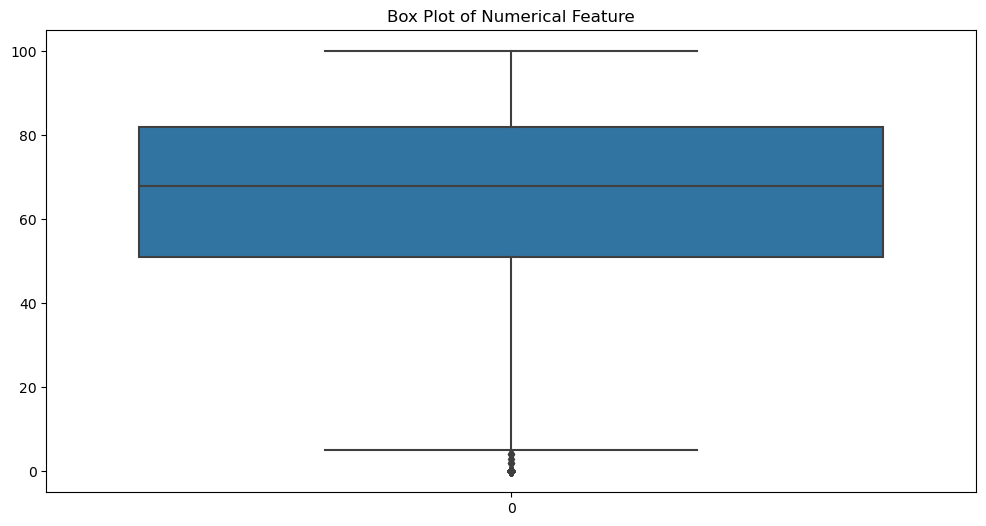

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(dataframe["audienceScore"], kde=True)
plt.title("Distribution of Numerical Feature")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=dataframe["audienceScore"])
plt.title("Box Plot of Numerical Feature")
plt.show()


Correlation Heatmap

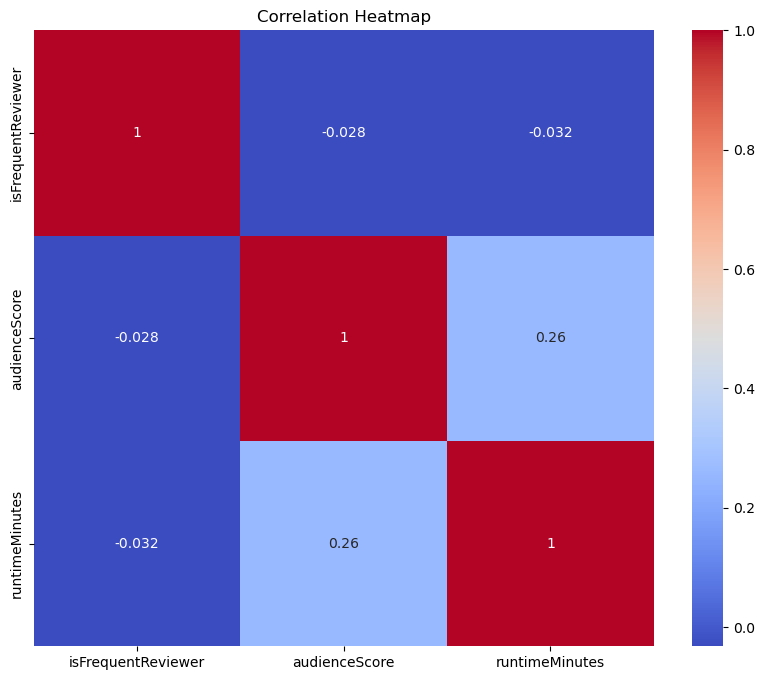

In [7]:
correlation_matrix = dataframe.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Feature Relationship

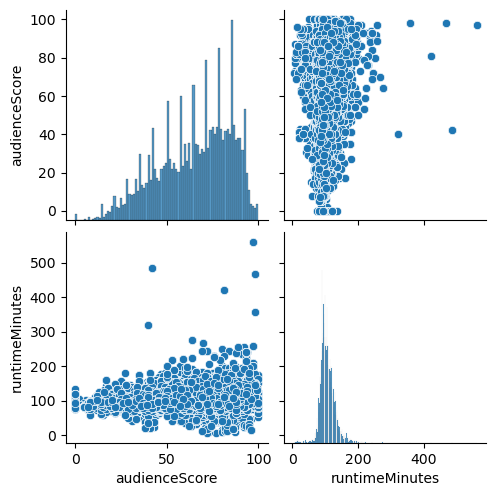

In [8]:
sns.pairplot(dataframe[["audienceScore", "runtimeMinutes", "sentiment"]])
plt.show()

Missing Values 

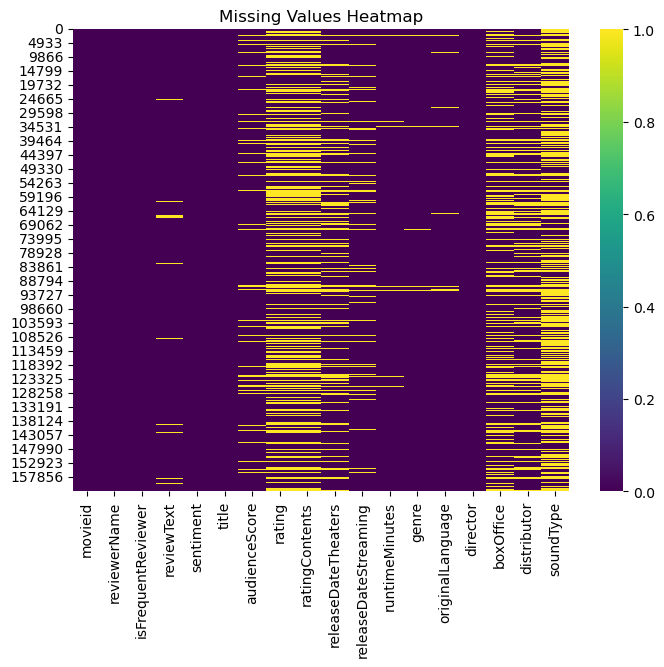

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataframe.isnull(), cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()



# preprocessing of merged_train data

In [10]:
data_types = dataframe.dtypes
null_values = dataframe.isnull().sum()
table_data = pd.DataFrame({'Data Type': data_types, 'Null Values': null_values})
print(table_data)

                     Data Type  Null Values
movieid                 object            0
reviewerName            object            0
isFrequentReviewer        bool            0
reviewText              object         6447
sentiment               object            0
title                   object            0
audienceScore          float64        13248
rating                  object        63724
ratingContents          object        63724
releaseDateTheaters     object        35834
releaseDateStreaming    object        16185
runtimeMinutes         float64         3376
genre                   object         2438
originalLanguage        object         3290
director                object            0
boxOffice               object        52776
distributor             object        40663
soundType               object        85367


In [11]:
dataframe['releaseDateTheaters'] = pd.to_datetime(dataframe['releaseDateTheaters'], errors='coerce')
print(dataframe['releaseDateTheaters'].dt.year.sort_values(ascending=False))
release_year_counts = dataframe['releaseDateTheaters'].dt.year.value_counts().sort_values(ascending=False)
print(release_year_counts)

103072    2025.0
80084     2025.0
87499     2025.0
33337     2025.0
13818     2025.0
           ...  
162738       NaN
162740       NaN
162747       NaN
162753       NaN
162755       NaN
Name: releaseDateTheaters, Length: 162758, dtype: float64
2018.0    7040
2019.0    6873
2016.0    6441
2017.0    6213
2021.0    5848
          ... 
2024.0      10
1916.0       6
1919.0       3
1918.0       1
1920.0       1
Name: releaseDateTheaters, Length: 110, dtype: int64


In [12]:
filtered_reviews = dataframe[dataframe['releaseDateTheaters'].dt.year > 2022]['reviewText']
print(filtered_reviews)
dataframe = dataframe[dataframe['releaseDateTheaters'].dt.year <= 2022]

309       &#91;O&#93;ne gets the sense that this movie w...
362       The exploration is deep&#44; very deep&#44; so...
569       Johnstone&#8217;s film revels in the humor of ...
617       Despite the chaos of the mixed genres and the ...
867       Although “When You Finish Saving the World” is...
                                ...                        
161804    The film succeeds mightily... by virtue of lea...
161896    An overcooked script... keeps Creed III from l...
161950    &apos;A Thousand and One&apos; is a narrative ...
162390    Few series of this type have maintained this l...
162752    Spectacular action set-pieces, clever writing ...
Name: reviewText, Length: 1382, dtype: object


In [13]:
dataframe['releaseDateTheaters'] = pd.to_datetime(dataframe['releaseDateTheaters'], errors='coerce')
print(dataframe['releaseDateTheaters'].dt.year.sort_values(ascending=False))
release_year_counts = dataframe['releaseDateTheaters'].dt.year.value_counts().sort_values(ascending=False)
print(release_year_counts)

0        2022
49612    2022
95113    2022
95092    2022
95070    2022
         ... 
37034    1915
41166    1915
66907    1915
81248    1915
80369    1915
Name: releaseDateTheaters, Length: 125542, dtype: int64
2018    7040
2019    6873
2016    6441
2017    6213
2021    5848
        ... 
1922      13
1916       6
1919       3
1918       1
1920       1
Name: releaseDateTheaters, Length: 107, dtype: int64


# feature selection

In [14]:
column_drop = ['title','isFrequentReviewer','genre','director','rating','reviewerName','originalLanguage','runtimeMinutes','ratingContents','distributor','boxOffice','releaseDateTheaters','releaseDateStreaming','soundType']
dataframe = dataframe.drop(columns=column_drop)

# handle missing values

In [15]:
dataframe["reviewText"].fillna("", inplace=True)
dataframe.dropna(subset=['sentiment'], inplace=True) 

In [16]:
print('mode: ',dataframe['audienceScore'].mode())
(dataframe.describe())

mode:  0    86.0
Name: audienceScore, dtype: float64


,audienceScore
count,123975.000000
mean,66.364920
std,19.220236
min,0.000000
25%,52.000000
50%,69.000000
75%,82.000000
max,100.000000


# imputation

In [17]:
from sklearn.impute import SimpleImputer
dataframe['audienceScore'] = dataframe['audienceScore'].astype(float)
imputer = SimpleImputer(strategy='most_frequent')
dataframe['audienceScore_imputed'] = imputer.fit_transform(dataframe[['audienceScore']])
print('done')
dataframe.describe()

done


,audienceScore,audienceScore_imputed
count,123975.000000,125542.000000
mean,66.364920,66.610003
std,19.220236,19.223907
min,0.000000,0.000000
25%,52.000000,52.000000
50%,69.000000,70.000000
75%,82.000000,83.000000
max,100.000000,100.000000


In [18]:
column_drop = ['audienceScore']
dataframe = dataframe.drop(columns=column_drop)

In [19]:
data_types = dataframe.dtypes
null_values = dataframe.isnull().sum()
table_data = pd.DataFrame({'Data Type': data_types, 'Null Values': null_values})
print(table_data)

                      Data Type  Null Values
movieid                  object            0
reviewText               object            0
sentiment                object            0
audienceScore_imputed   float64            0


In [20]:
dataframe.to_csv('dropped_dataframe.csv', index = False)

# preprocessing for merged_test data

In [21]:
print('merged test')
data_types = merged_test.dtypes
null_values = merged_test.isnull().sum()
table_data = pd.DataFrame({'Data Type': data_types, 'Null Values': null_values})
print(table_data)


merged test
                     Data Type  Null Values
movieid                 object            0
reviewerName            object            0
isTopCritic               bool            0
reviewText              object         2510
title                   object            0
audienceScore          float64         4931
rating                  object        24296
ratingContents          object        24296
releaseDateTheaters     object        13702
releaseDateStreaming    object         5974
runtimeMinutes         float64         1262
genre                   object          920
originalLanguage        object         1238
director                object            0
boxOffice               object        19995
distributor             object        15596
soundType               object        30626


# feature selection

In [22]:
column_drop = ['title','rating','ratingContents','releaseDateTheaters','releaseDateStreaming','runtimeMinutes','genre','originalLanguage','director','boxOffice','distributor','soundType','reviewerName','isTopCritic']
merged_test = merged_test.drop(columns=column_drop)
merged_test['reviewText'].fillna("", inplace=True)

# handle missing values 

In [23]:
print('mode: ',merged_test['audienceScore'].mode())
(merged_test.describe())

mode:  0    86.0
Name: audienceScore, dtype: float64


,audienceScore
count,50384.000000
mean,65.000179
std,20.108764
min,0.000000
25%,50.000000
50%,68.000000
75%,82.000000
max,100.000000


# imputation

In [24]:
from sklearn.impute import SimpleImputer
merged_test['audienceScore'] = merged_test['audienceScore'].astype(float)
imputer = SimpleImputer(strategy='most_frequent')
merged_test['audienceScore_imputed'] = imputer.fit_transform(merged_test[['audienceScore']])
print('done\n')

dataframe.describe()

done



,audienceScore_imputed
count,125542.000000
mean,66.610003
std,19.223907
min,0.000000
25%,52.000000
50%,70.000000
75%,83.000000
max,100.000000


In [25]:
column_drop = ['audienceScore']
merged_test = merged_test.drop(columns=column_drop)

In [26]:
data_types = merged_test.dtypes
null_values = merged_test.isnull().sum()
table_data = pd.DataFrame({'Data Type': data_types, 'Null Values': null_values})
print(table_data)

                      Data Type  Null Values
movieid                  object            0
reviewText               object            0
audienceScore_imputed   float64            0


# data transformation


In [27]:
# for train data
from scipy import sparse
datatrain = dataframe[['reviewText', 'audienceScore_imputed']].copy()
tfidf_vectorizer = TfidfVectorizer(min_df=5)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(datatrain['reviewText'])
X_text = tfidf_matrix_train
X_numerical = datatrain[['audienceScore_imputed']].values
X_train = sparse.hstack((X_text, X_numerical))
y_train = dataframe['sentiment']

# for test data
datatest = merged_test[['reviewText']].copy()
datatest.dropna(subset=['reviewText'], inplace=True)
tfidf_matrix_test = tfidf_vectorizer.transform(datatest['reviewText'])
X_text_test = tfidf_matrix_test
X_numerical_test = merged_test[['audienceScore_imputed']].values  # Use the original 'audienceScore' column for test
X_test = sparse.hstack((X_text_test, X_numerical_test))
print('done')

done


# splitting data into training and validating data

In [28]:
from sklearn.model_selection import train_test_split
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('done')

done


# **Models**

**SGDClassifier**

In [29]:
print('SGD')
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(alpha= 3.14891164795686e-05, loss= 'hinge', max_iter= 3000, penalty= 'l1', random_state= 42) # audScore+reText+HPT
# sgd_classifier = SGDClassifier(alpha=4.207053950287935e-06, loss='modified_huber', max_iter=3000, penalty='elasticnet', random_state=42)
# sgd_classifier = SGDClassifier(max_iter=1000, random_state=42)
sgd_classifier.fit(X_train_split, y_train_split)
sgd_train_accuracy = sgd_classifier.score(X_train_split, y_train_split)
print(f"Training Accuracy: {sgd_train_accuracy}")
sgd_val_accuracy = sgd_classifier.score(X_val, y_val)
print(f"Validation Accuracy: {sgd_val_accuracy}")

y_pred_test = sgd_classifier.predict(X_test)
submission = pd.DataFrame(y_pred_test, columns=["sentiment"])
submission.to_csv("submission_sgd.csv", index_label="id")
print('done')

SGD
Training Accuracy: 0.7592524369480151
Validation Accuracy: 0.7542315504400813
done


**Hyperparameter tuning for SGD**

In [30]:
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, loguniform
import time as t
s=t.time()
param_dist = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'alpha': loguniform(1e-6, 1e-2),
    'penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000, 3000],
    'random_state': [42]
}
sgd_classifier = SGDClassifier()
random_search = RandomizedSearchCV(sgd_classifier, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train_split, y_train_split)
best_params = random_search.best_params_
best_classifier = random_search.best_estimator_

best_classifier.fit(X_train_split, y_train_split)

best_train_accuracy = best_classifier.score(X_train_split, y_train_split)
print(f"Training Accuracy: {best_train_accuracy}")
best_val_accuracy = best_classifier.score(X_val, y_val)
print(f"Validation Accuracy: {best_val_accuracy}")

print(f'Best params: {best_params}')
y_pred_test = best_classifier.predict(X_test)

submission = pd.DataFrame(y_pred_test, columns=["sentiment"])
submission.to_csv("submission_sgd.csv", index_label="id")
print('done')
e=t.time()
e-s

Training Accuracy: 0.7592524369480151
Validation Accuracy: 0.7542315504400813
Best params: {'alpha': 3.14891164795686e-05, 'loss': 'hinge', 'max_iter': 3000, 'penalty': 'l1', 'random_state': 42}
done


304.8181850910187

**LinearSVC**

In [31]:
print('LinearSVC')
from sklearn.svm import LinearSVC
# linear_svc = LinearSVC(C= 3.8720902953704153, loss= 'hinge', max_iter = 1000, random_state = 42)
# linear_svc = LinearSVC(C= 0.25706035661175963, loss= 'squared_hinge', max_iter= 3000, random_state= 42) #audsco hpt
linear_svc = LinearSVC(random_state = 42)
linear_svc.fit(X_train_split, y_train_split)

svc_train_accuracy = linear_svc.score(X_train_split, y_train_split)
print(f"Training Accuracy: {svc_train_accuracy}")
svc_val_accuracy = linear_svc.score(X_val, y_val)
print(f"Validation Accuracy: {svc_val_accuracy}")

y_pred_test = linear_svc.predict(X_test)
submission = pd.DataFrame(y_pred_test, columns=["sentiment"])
submission.to_csv("submission_linearsvc.csv", index_label="id")
print('done')

LinearSVC
Training Accuracy: 0.8056415719932691
Validation Accuracy: 0.7767334421920427
done


In [32]:
linear_svc1 = LinearSVC(random_state = 42)
linear_svc1.fit(X_train, y_train)

svc_train_accuracy = linear_svc1.score(X_val, y_val)
print(f"Training Accuracy: {svc_train_accuracy}")

Training Accuracy: 0.8518459516508025


**Logistic Regression**

In [33]:
print('Log Reg')
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_split, y_train_split)
log_reg_train_accuracy = logreg.score(X_train_split, y_train_split)
print(f"Training Accuracy: {log_reg_train_accuracy}")
log_reg_val_accuracy = logreg.score(X_val, y_val)
print(f"Validation Accuracy: {log_reg_val_accuracy}")

y_pred_test = logreg.predict(X_test)
submission = pd.DataFrame(y_pred_test, columns=["sentiment"])
submission.to_csv("submission_log_reg.csv", index_label="id")
print('done')

Log Reg
Training Accuracy: 0.8237730626387741
Validation Accuracy: 0.8027400533673185
done


**Multinomial Naive Bayes**

In [34]:
print('Multinomial NB')
from sklearn.naive_bayes import MultinomialNB
# multi_nb = MultinomialNB(alpha=0.23357214690901212) #AudScore + reviewText HPT
multi_nb = MultinomialNB(alpha=0.0001)
multi_nb.fit(X_train_split, y_train_split)

multi_nb_train_accuracy = multi_nb.score(X_train_split, y_train_split)
print(f"Training Accuracy: {multi_nb_train_accuracy}")
multi_nb_val_accuracy = multi_nb.score(X_val, y_val)
print(f"Validation Accuracy: {multi_nb_val_accuracy}")

y_pred_test = multi_nb.predict(X_test)
submission = pd.DataFrame(y_pred_test, columns=["sentiment"])
submission.to_csv("submission_multi_nb.csv", index_label="id")
print('done')

Multinomial NB
Training Accuracy: 0.831927752830245
Validation Accuracy: 0.7840614918953364
done


# Comparison

In [35]:
scores = [['LinearSVC',svc_train_accuracy,svc_val_accuracy],
          ['Logistic Regression',log_reg_train_accuracy,log_reg_val_accuracy],
           ['Multinomial NB',multi_nb_train_accuracy,multi_nb_val_accuracy],
          ['SGD',sgd_train_accuracy,sgd_val_accuracy]]

score_df = pd.DataFrame(scores, columns = ['Model' , 'TrainScore','ValidationScore'])
score_df

,Model,TrainScore,ValidationScore
0,LinearSVC,0.851846,0.776733
1,Logistic Regression,0.823773,0.802740
2,Multinomial NB,0.831928,0.784061
3,SGD,0.759252,0.754232


In [36]:
score_df.sort_values(by=["TrainScore", "ValidationScore"], ascending = False)

,Model,TrainScore,ValidationScore
0,LinearSVC,0.851846,0.776733
2,Multinomial NB,0.831928,0.784061
1,Logistic Regression,0.823773,0.802740
3,SGD,0.759252,0.754232


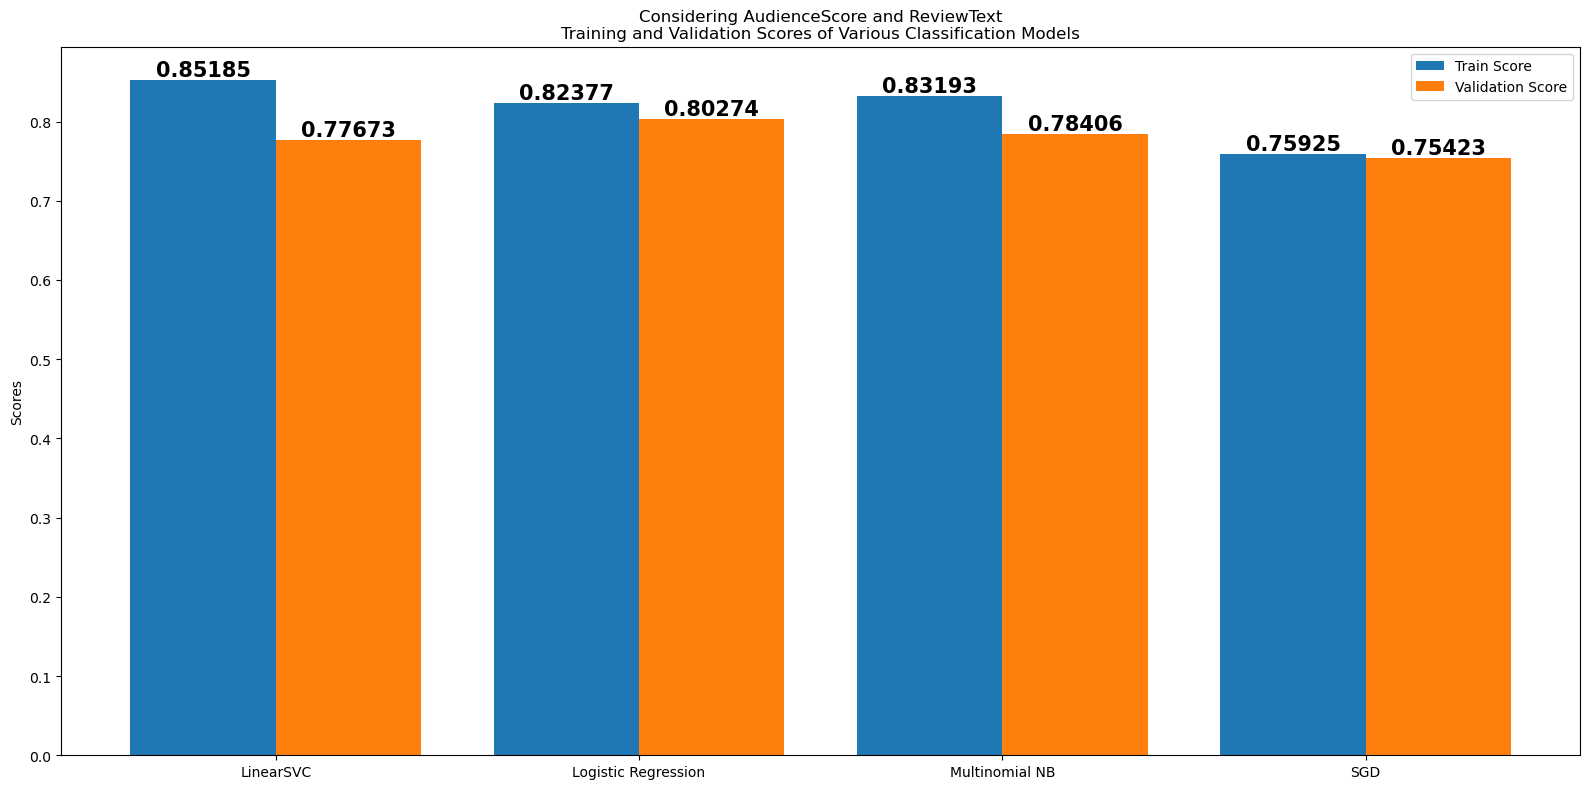

In [37]:
import numpy as np
import matplotlib.pyplot as plt

xpos = np.arange(4)
plt.figure(figsize=(16, 8))

plt.xticks(xpos, score_df['Model'])
plt.ylabel("Scores")
plt.title("Considering AudienceScore and ReviewText\nTraining and Validation Scores of Various Classification Models")
trainbar = plt.bar(xpos - 0.2, score_df['TrainScore'], width=0.4, label="Train Score")
valbar = plt.bar(xpos + 0.2, score_df['ValidationScore'], width=0.4, label="Validation Score")

plt.legend()

for count, rect in enumerate(trainbar + valbar):
    height = rect.get_height()
    plt.text(
        rect.get_x() + rect.get_width() / 2.0,
        height,
        "%0.5f" % score_df["TrainScore"][count] if count < 4 else "%0.5f" % score_df["ValidationScore"][count - 4],
        ha="center",
        va="bottom",
        weight="bold",
        fontsize=15,
    )

plt.tight_layout()
plt.show()
